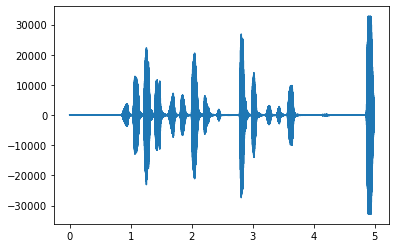

In [6]:
import numpy as np
import pyaudio
import wave
import scipy.io.wavfile as wavfile
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
rate, data = wavfile.read('test5.wav')
t = np.arange(len(data[:,0]))*1.0/rate
pl.plot(t, data[:,1])
pl.show()

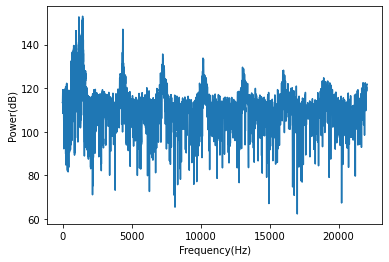

In [7]:
p = 20*np.log10(np.abs(np.fft.rfft(data[:, 0])))
f = np.linspace(0, rate/2.0, len(p))
pl.plot(f, p)
pl.xlabel("Frequency(Hz)")
pl.ylabel("Power(dB)")
pl.show()

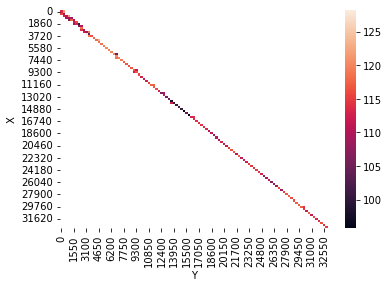

In [8]:
# Obtain frequency data for left and right speakers
left_freq=abs(data[:,0])
right_freq=abs(data[:,1])
# Obtain power data
power = 20*np.log10(np.abs(np.fft.rfft(data[:, 0])))
# Ensure all data sets are same size
def altElement(a):
     return a[::2]
left_freq_mod=altElement(left_freq)
right_freq_mod=altElement(right_freq)
power_mod=power[:-1]
# Split frequency data into buckets to make heatmap more easily visible
# And create single dataframe with all necessary information together
def myround(x, base=310):
    return base * round(x/base)
X = list(map(lambda x: myround(x), left_freq_mod))
Y = list(map(lambda x: myround(x), right_freq_mod))
Z = list(power_mod)
heatmap_df = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
# Filter out duplicate data and prepare dataframe for graphing
heatmap_df['tuples'] = heatmap_df['X'].astype(str)+heatmap_df['Y'].astype(str)
heatmap_df=heatmap_df.drop_duplicates(subset='tuples', keep="first")
heatmap_df=heatmap_df[["X", "Y", "Z"]]
data_pivoted = heatmap_df.pivot("X", "Y", "Z")
# Graph heatmap
ax = sns.heatmap(data_pivoted)